<h1 style="font-size:36px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Project:</span>Employee Retention using ML </h1>
<hr>

This is second capstone project for Masterclass course and valid permission has been taken to use the data for analytics purpose in order to reach the objectives of this project. 

## Project Context 

 - The HR department at a large company wants to unveil a new initiative to proactively retain their employees.
 
 
 - Using data, they are looking to identify employees who are likely to leave and take proactive actions to reach out to those employees before it's too late.
 
 
 - The HR department only cares about the permanent employees for this initiative.

## Current Structure

- The department currently arrange an 'exit-interview' and ask employees to share their reason for leaving.

- HR tries to learn insight from the interview and make changes in the company. The issue here is that HR can't aggregate all these insights systematically.

- This structure doesn't allow proactive actions, because here 'exit-interviews' are driving the policy changes.

## Goal:

- The goal here is to ***build a model which can identify those employees who are likely to leave.***

   So, the problem specifics are :

   Deliverable : **Executable Model Script** <br>
   Machine Learning task : **Classification**<br>
   Targte Variable : **Status (Employed/Left)**<br>
   Win Condition : **Best Possible Model**

### 1. Collecting Data

 - The dataset is adapted from a synthetic one because companies do not release this type of data.
 
 - The features of the dataset are realistic and hand-vatted. Proper permissions have been taken from EliteDataScience team to use this data for the capstone project.
 
 - The data is collected in CSV format and I have used various python libraries to deduce actionable insight from this dataset.

In [2]:
from __future__ import print_function

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10,7)

import seaborn as sns
sns.set_context('talk')

import sklearn

import pickle


The dataset is in CSV format, so I will use Pandas library to import the data

In [3]:
df = pd.read_csv('employee_data.csv')

### 2. Exploratory Data Analysis

#### *2.1 Basic Information:*

In [4]:
# Finding the shape of the dataset
df.shape

(14249, 10)

In [5]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [6]:
# Finding the count of each datatype
df.get_dtype_counts()

float64    5
int64      2
object     3
dtype: int64

So, there are 3 categorical variables in the dataset.

In [14]:
# Finding the Categorical features
df.dtypes[df.dtypes == 'object']    

department    object
salary        object
status        object
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
avg_monthly_hrs      14249 non-null int64
department           13540 non-null object
filed_complaint      2058 non-null float64
last_evaluation      12717 non-null float64
n_projects           14249 non-null int64
recently_promoted    300 non-null float64
salary               14249 non-null object
satisfaction         14068 non-null float64
status               14249 non-null object
tenure               14068 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [16]:
df.head(11)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
5,140,sales,NaN,0.589097,4,NaN,medium,0.660020,Employed,4.0
6,121,sales,1.0,0.625399,3,NaN,low,0.835571,Employed,3.0
7,150,engineering,NaN,0.644586,4,NaN,low,0.796683,Employed,3.0
8,215,engineering,1.0,0.524114,3,NaN,medium,0.715005,Employed,7.0
9,269,support,NaN,0.909364,5,NaN,medium,0.994037,Employed,2.0


In [17]:
df.tail(11)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14238,153,sales,NaN,0.899024,4,NaN,low,0.885950,Employed,4.0
14239,242,finance,NaN,0.781112,6,NaN,low,0.669866,Left,5.0
14240,131,engineering,NaN,0.531197,2,NaN,low,0.341842,Left,3.0
14241,235,IT,NaN,0.683498,3,NaN,medium,0.923564,Employed,3.0
14242,157,support,NaN,0.707167,5,NaN,low,0.834708,Employed,4.0
14243,272,engineering,NaN,0.815504,4,NaN,low,0.693387,Employed,2.0
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0


#### *2.2 Numeric Features Distribution:*

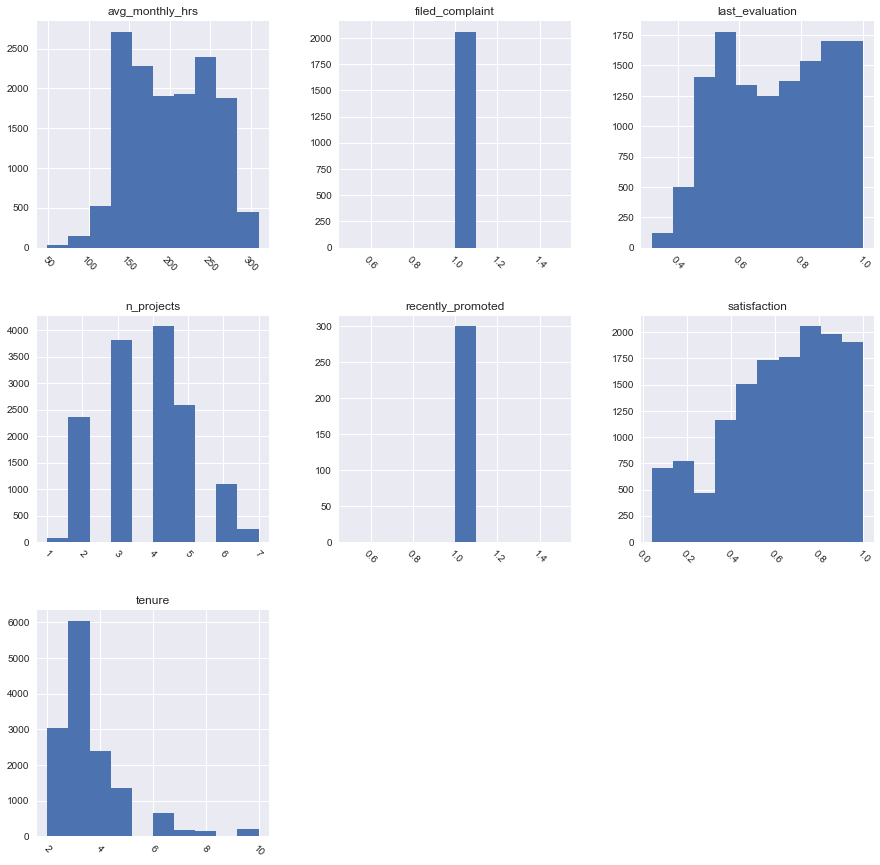

In [19]:
df.hist(figsize=(15,15), xrot = -45)
plt.show()

In [20]:
# Summarizing the Numerical features
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


#### *2.3 Categorical Features Distribution:*

In [21]:
# Summarizing categorical features
df.describe(include=['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


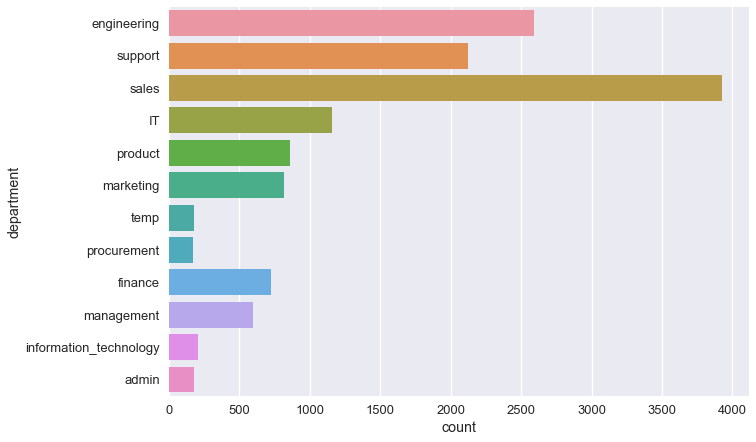

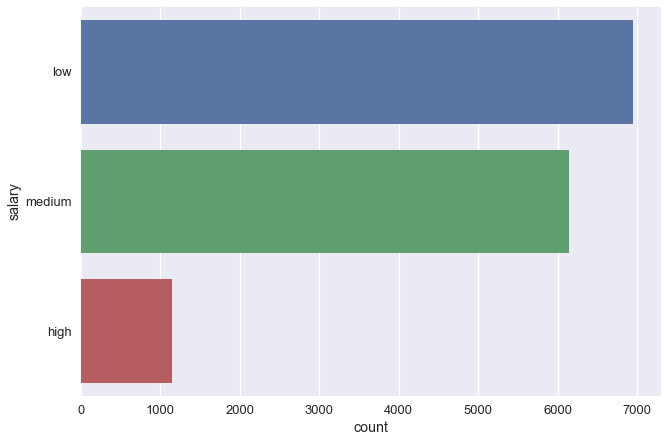

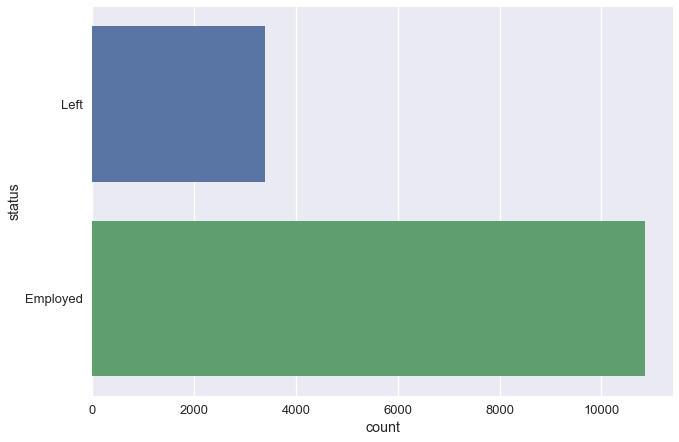

In [24]:
# Bar plot for each categorical features
for i in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y = i, data = df)
    plt.show()

#### *2.4 Segmentation:*

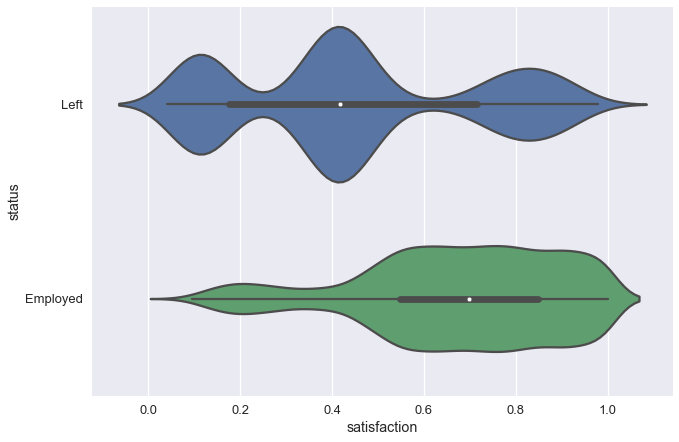

In [25]:
# Segment satisfaction by status and plot distributions
sns.violinplot(y = 'status', x = 'satisfaction', data = df )

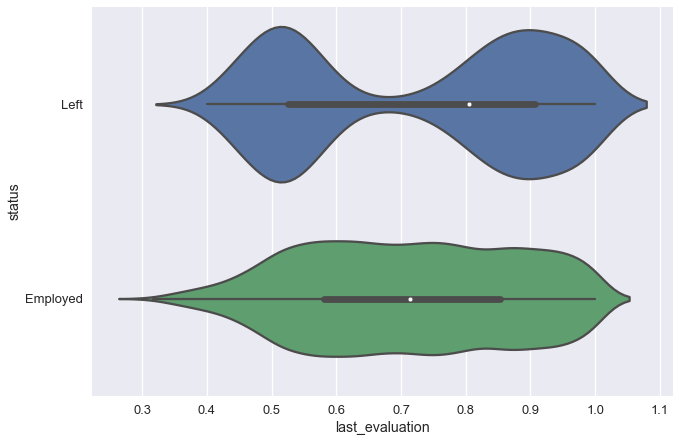

In [26]:
# Segment last_evaluation by status and plot distributions
sns.violinplot( y = 'status', x = 'last_evaluation', data = df)

In [27]:
# Segment by status and display the means within each class
df.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,1.0,0.714479,3.755273,1.0,0.675979,3.380245
Left,206.502948,1.0,0.730706,3.833137,1.0,0.447500,3.869023


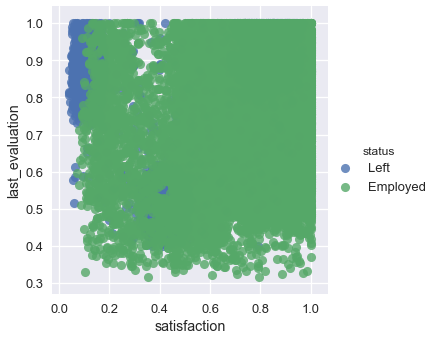

In [28]:
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(y = 'last_evaluation', x = 'satisfaction', hue = 'status', data = df, fit_reg=False)
plt.show()

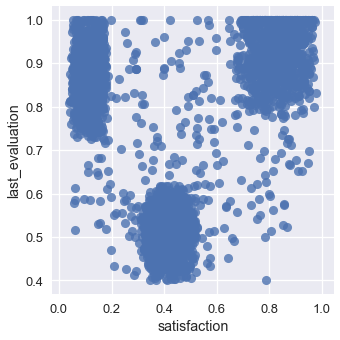

In [29]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(y = 'last_evaluation', x = 'satisfaction', data = df[df.status == 'Left'], fit_reg=False)
plt.show()

### 3. Data Cleaning

#### *3.1 Removing Duplicates:*

In [30]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [31]:
df.shape

(14221, 10)

In [32]:
# Unique classes of 'department'
df.department.unique()

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'temp', 'procurement', 'finance', nan, 'management',
       'information_technology', 'admin'], dtype=object)

Since, the scope of this initiative is restricted only to permanent employees, 'temp' employees should be cleared from this dataset.

In [34]:
# Removing the unwanted data
df = df[df['department'] != 'temp']

In [35]:
df.shape

(14068, 10)

#### *3.2 Structural Errors, Typos :*

In [36]:
# Print unique values of 'filed_complaint'
print(df['filed_complaint'].unique())

[ nan   1.]


In [37]:
# Print unique values of 'recently_promoted'
print(df['recently_promoted'].unique())

[ nan   1.]


Even though the NaN values are "missing," here they actually indicate employees who have not filed complaints or those who have not been recently promoted.

In [53]:
df['filed_complaint'].fillna(0, inplace=True)

In [54]:
df['recently_promoted'].fillna(0, inplace=True)

In [55]:
# Print unique values of 'filed_complaint'
print(df['filed_complaint'].unique())

# Print unique values of 'recently_promoted'
print(df['recently_promoted'].unique())

[ 0.  1.]
[ 0.  1.]


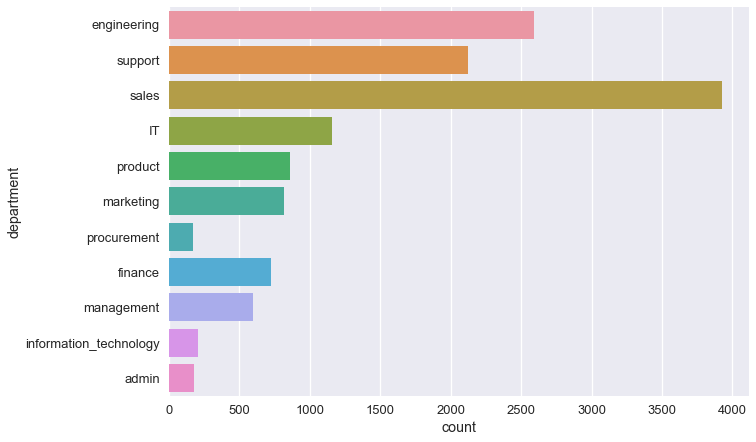

In [49]:
sns.countplot(y='department', data=df)

I combine **'information_technology'** and **'IT'** together, because its the same and should be clubbed together.

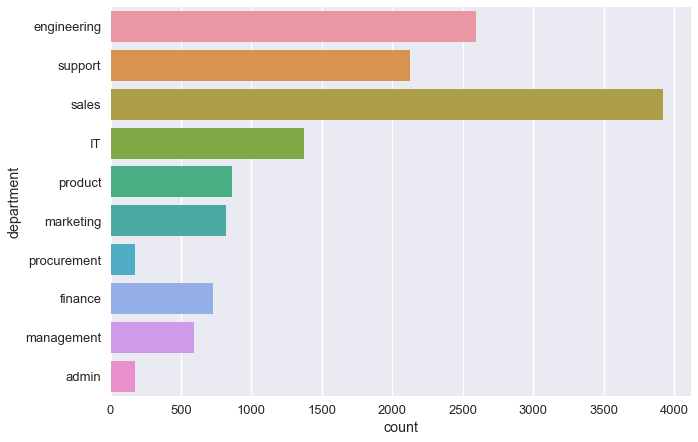

In [52]:
# 'information_technology' should be 'IT'
df['department'].replace('information_technology', 'IT', inplace=True)

# Plot class distributions for 'department'
sns.countplot(y='department', data=df)

#### *3.3 Outliers:*

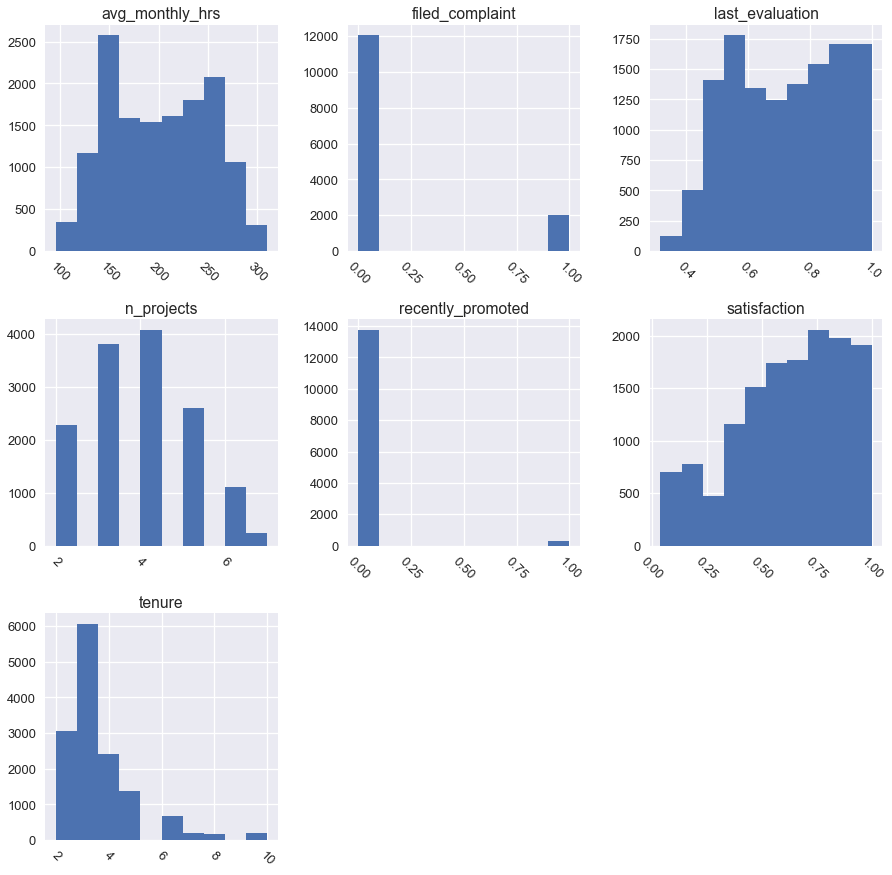

In [56]:
df.hist(figsize=(15,15), xrot = -45)
plt.show()

The distribution makes it clear that there are no extreme values in the dataset. So the dataset is free from outliers.

#### *3.4 Missing Values:*

In [57]:
# Display number of missing values by feature
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

In [58]:
# Fill missing values in department with 'Missing'
df['department'].fillna('Missing', inplace=True)

In [59]:
# Indicator variable for missing last_evaluation
df['last_evaluation_missing'] = df['last_evaluation'].isnull().astype(int)

In [60]:
# Fill missing values in last_evaluation with 0
df['last_evaluation'].fillna(0, inplace=True)

In [61]:
# Display number of missing values by feature
df.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
last_evaluation_missing    0
dtype: int64

<br>

### 4. Feature Engineering

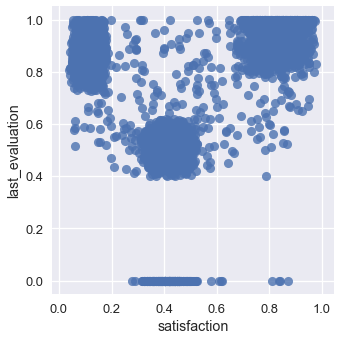

In [62]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(y = 'last_evaluation', x = 'satisfaction', data = df[df['status'] == 'Left'], fit_reg=False)

From this plot, I can see that there are 3 clusters, means 3 different groups. 

It would be useful if I create 3 indicator variables for these 3 groups namely **underperformer, unhappy & overachiever** 

In [63]:
# Create indicator features
df['underperformer'] = ((df['last_evaluation'] < 0.6) & (df['last_evaluation_missing'] == 0)).astype(int)

df['unhappy'] = (df['satisfaction'] < 0.2).astype(int)

df['overachiever'] = ((df['last_evaluation'] > 0.8) & (df['satisfaction'] > 0.7)).astype(int)

In [64]:
# The proportion of observations belonging to each group
df[['underperformer', 'unhappy', 'overachiever']].mean()

underperformer    0.285257
unhappy           0.092195
overachiever      0.177069
dtype: float64

In [65]:
 # Convert status to an indicator variable
df['status'] = pd.get_dummies( df['status'] ).Left

In [66]:
# The proportion of observations who 'Left'
df['status'].mean()

0.23933750355416547

In [67]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns=['department', 'salary'])

# Display first 10 rows
df.head(11)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,unhappy,overachiever,department_IT,department_Missing,department_admin,department_engineering,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5,140,0.0,0.589097,4,0.0,0.660020,0,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6,121,1.0,0.625399,3,0.0,0.835571,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7,150,0.0,0.644586,4,0.0,0.796683,0,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8,215,1.0,0.524114,3,0.0,0.715005,0,7.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9,269,0.0,0.909364,5,0.0,0.994037,0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


I will save this data as Analytical Base data in a CSV format, so that if this data is required later for further analysis, I won't need to clean and transform the data from the begining.

In [68]:
# Save analytical base table
df.to_csv('analytical_base_table.csv', index=None)

<br>
### 5. Model Training###

Since it is a classification problem, I will use some classification machine learning algorithm **(Logistic Regression, Random Forest Classifier, Boosted Tree Classifier)** and select the best one.

In [69]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [92]:
# For splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# For standardization
from sklearn.preprocessing import StandardScaler

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

# Classification metrics 
from sklearn.metrics import roc_curve, roc_auc_score

In [78]:
df = pd.read_csv('analytical_base_table.csv')

#### *5.1 Splitting the dataset*

In [74]:
# Shuffling the dataset before splitting
df = df.iloc[np.random.permutation(len(df))]

In [75]:
# Create separate object for target variable
y = df['status'].values

# Create separate object for input features
X = df.drop('status',1).values

In [81]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234, stratify = y)

# Print number of observations in X_train, X_test, y_train, and y_test
print("X_train :{}, X_test :{}, y_train :{}, y_test :{}".format(len(X_train),len(X_test),len(y_train),len(y_test)))

X_train :11254, X_test :2814, y_train :11254, y_test :2814


#### *5.2 Building Pipeline*

In [80]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,unhappy,overachiever,department_IT,department_Missing,department_admin,department_engineering,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
count,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000
mean,201.083736,0.143944,0.649479,3.801038,0.021325,0.621295,0.239338,3.497228,0.096034,0.285257,0.092195,0.177069,0.097384,0.050398,0.012511,0.184248,0.051749,0.042295,0.058217,0.012368,0.061132,0.278860,0.150839,0.081177,0.488413,0.430409
std,49.959962,0.351045,0.268123,1.236058,0.144470,0.250469,0.426694,1.460917,0.294648,0.451553,0.289311,0.381740,0.296491,0.218773,0.111153,0.387700,0.221527,0.201268,0.234162,0.110528,0.239580,0.448454,0.357904,0.273117,0.499884,0.495151
min,96.000000,0.000000,0.000000,2.000000,0.000000,0.040058,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,156.000000,0.000000,0.525727,3.000000,0.000000,0.450390,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,200.000000,0.000000,0.688023,4.000000,0.000000,0.652527,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,245.000000,0.000000,0.858129,5.000000,0.000000,0.824951,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,310.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


I can see that the data needs to be standardized before applying classification algorithms on it.

In [77]:
# Pipeline dictionary
pipelines = {
    'l1' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state=123)),
    'l2' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
}

#### *5.3 Hyperparameter Tuning*

For hyperparameter tuning, first I need to find out the tunable parameters of each model.

In [82]:
# List tuneable hyperparameters of our Logistic pipeline
pipelines['l1'].get_params()

{'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=123, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'ovr',
 'logisticregression__n_jobs': 1,
 'logisticregression__penalty': 'l1',
 'logisticregression__random_state': 123,
 'logisticregression__solver': 'liblinear',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscal

In [83]:
# Logistic Regression hyperparameters
l1_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10)
}

l2_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10)
}

In [84]:
# List tuneable hyperparameters of Random Forest pipeline
pipelines['rf'].get_params()

{'randomforestclassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, n_jobs=1, oob_score=False, random_state=123,
             verbose=0, warm_start=False),
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__min_impurity_split': 1e-07,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 10,
 'randomforestclassifier__n_jobs': 1,
 'randomforest

In [85]:
# Random Forest hyperparameters
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto','sqrt', 0.33]
}

In [86]:
# List tuneable hyperparameters of Gradient Boosting pipeline
pipelines['gb'].get_params()

{'gradientboostingclassifier': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_split=1e-07, min_samples_leaf=1,
               min_samples_split=2, min_weight_fraction_leaf=0.0,
               n_estimators=100, presort='auto', random_state=123,
               subsample=1.0, verbose=0, warm_start=False),
 'gradientboostingclassifier__criterion': 'friedman_mse',
 'gradientboostingclassifier__init': None,
 'gradientboostingclassifier__learning_rate': 0.1,
 'gradientboostingclassifier__loss': 'deviance',
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__max_features': None,
 'gradientboostingclassifier__max_leaf_nodes': None,
 'gradientboostingclassifier__min_impurity_split': 1e-07,
 'gradientboostingclassifier__min_samples_leaf': 1,
 'gradientboostingclassifier__min_samples_split': 2,
 'gradientboostingc

In [87]:
# Boosted Tree hyperparameters
gb_hyperparameters ={
    'gradientboostingclassifier__n_estimators' : [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 1, 0.2],
    'gradientboostingclassifier__max_depth' : [1, 3, 5]
}

In [88]:
# Create hyperparameters dictionary
hyperparameters = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

#### *5.4 Cross-validation*

In [89]:
fitted_models = {}

# Looping through model pipelines, tuning each one and saving it to fitted_models
for name, ppln in pipelines.items():
    model = GridSearchCV(ppln, hyperparameters[name], cv=10, n_jobs=-1)
    model.fit(X_train, y_train)
    
    fitted_models[name] = model
    
    print(name,'has been fitted')

l1 has been fitted
l2 has been fitted
rf has been fitted
gb has been fitted


#### *5.5 Model Evaluation*

In [90]:
# Displaying best_score_ for each fitted model
for name, model in fitted_models.items():
    print(name, model.best_score_ )

l1 0.846454593922
l2 0.846454593922
rf 0.980007108584
gb 0.977163675138


In [100]:
# Deriving the scores of each model
for name , model in fitted_models.items():
    
    pred = model.predict_proba(X_test)
    pred = [p[1] for p in pred]
    
    print(name, roc_auc_score(y_test, pred))   

l1 0.906305325933
l2 0.906303243891
rf 0.991598612805
gb 0.987595886717


From this I can see that : Random Forest has the highest AUC score among all these models.<br> So, **Random Forest** is the best possible model for this purpose.

In [101]:
# Finding the best estimator
fitted_models['rf'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.33, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False))])

The winning value for hyperparameters are:
 - n_estimator = 200
 - max_features = 0.33

In [104]:
# Winning model as final_model.pkl
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

#### *5.5 Project Delivery through Model Class*

In [106]:
class EmployeeRetentionModel:
    
    def __init__(self, model_location):
        with open(model_location, 'rb') as f:
            self.model = pickle.load(f)
    
    def predict_proba(self, X_new, clean=True, augment=True):
        if clean:
            X_new = self.clean_data(X_new)
        
        if augment:
            X_new = self.engineer_features(X_new)
        
        return X_new, self.model.predict_proba(X_new)
    
    # Add functions here
    def clean_data(self, df):
        # Drop duplicates
        df = df.drop_duplicates()

        # Drop temporary workers
        df = df[df.department != 'temp']

        # Missing filed_complaint values should be 0
        df['filed_complaint'] = df.filed_complaint.fillna(0)

        # Missing recently_promoted values should be 0
        df['recently_promoted'] = df.recently_promoted.fillna(0)

        # 'information_technology' should be 'IT'
        df.department.replace('information_technology', 'IT', inplace=True)

        # Fill missing values in department with 'Missing'
        df['department'].fillna('Missing', inplace=True)

        # Indicator variable for missing last_evaluation
        df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)

        # Fill missing values in last_evaluation with 0
        df.last_evaluation.fillna(0, inplace=True)

        # Return cleaned dataframe
        return df
    
    def engineer_features(self, df):
        # Create indicator features
        df['underperformer'] = ((df.last_evaluation < 0.6) & 
                                (df.last_evaluation_missing == 0)).astype(int)

        df['unhappy'] = (df.satisfaction < 0.2).astype(int)

        df['overachiever'] = ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7)).astype(int)
        
        
        # Create new dataframe with dummy features
        
        df = pd.get_dummies(df, columns=['department', 'salary'])
        

        # Return augmented DataFrame
        return df
    

### Conclusion:

From the model evaluation, we can see that Random Forest is the clear winner with the highest AUC score. <br>
This model will be able to predict which employee is likely to leave the company with better accuracy than other models. 